In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
green_data = pd.read_csv('../green_consensus.csv')
hinselmann_data = pd.read_csv('../hinselmann_consensus.csv')
schiller_data = pd.read_csv('../schiller_consensus.csv')

green_data['hinselmann'] = 0
green_data['schiller'] = 0
green_data['green'] = 1
hinselmann_data['hinselmann'] = 1
hinselmann_data['schiller'] = 0
hinselmann_data['green'] = 0
schiller_data['hinselmann'] = 0
schiller_data['schiller'] = 1
schiller_data['green'] = 0

data = pd.concat([green_data, hinselmann_data, schiller_data])
data = data.reset_index(drop=True)

In [39]:
classes = ['experts::{}'.format(i) for i in range(5)]
classes.extend(['consensus', 'hinselmann', 'schiller', 'green'])
X = data.drop(columns=classes)
y = data['consensus']
y_dataset = data[['green', 'schiller', 'hinselmann']].idxmax(axis=1)
y_dataset = y_dataset.map({'green': 0, 'hinselmann': 1, 'schiller': 2})

In [30]:
X.head()

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_cervix_hull_total,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.0,0.043500,0.010149,0.000133,...,0.373371,0.844454,0.408130,0.603399,0.571175,0.962995,0.357890,85.474311,0.265933,0.346294
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.0,0.097405,0.973837,0.004055,...,0.194308,0.646645,0.255673,0.497315,0.332444,0.894625,0.184803,124.794129,1.000000,0.283059
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.0,0.000000,0.000000,0.001756,...,0.497554,0.747443,0.611432,0.633925,0.720923,0.920287,0.496596,94.948697,0.518740,0.419375
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.0,0.017594,0.007208,0.001288,...,0.539286,0.855409,0.599998,0.618140,0.830304,0.964611,0.532073,74.221670,0.347202,0.361672
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.0,0.000000,0.000000,0.000196,...,0.408286,0.882990,0.442043,0.623938,0.625574,0.957604,0.407600,61.546536,0.437852,0.673196


In [40]:
color_cols = [col for col in X.columns if 'rgb' in col]
color_cols
X = X[color_cols]

In [41]:
# Scaling data

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [42]:
def kMeans(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    predicted = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    return predicted, labels

predicted, labels = kMeans(X, 3)


In [43]:
adjusted_rand_score(y_dataset, predicted)

0.3712064742910977

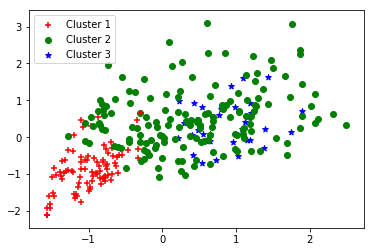

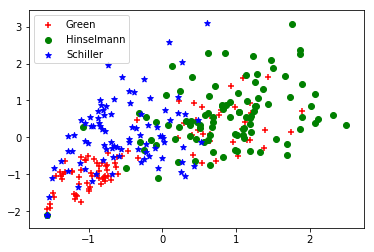

In [45]:
for i in range(0, X.shape[0]):
    if predicted[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif predicted[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif predicted[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
#pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.show()

for i in range(0, X.shape[0]):
    if y_dataset[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif y_dataset[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif y_dataset[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
pl.legend([c1, c2, c3], ['Green', 'Hinselmann', 'Schiller'])       
#pl.legend([c1, c2], ['No Failure', 'Failure'])
pl.show()